# Lupton RGB Cutouts

This notebook illustrates how to create a Lupton RGB cutout image from single-band cutout images. For simplicity, we pre-generated the single-band cutout images for a galaxy in the Extended Groth Strip for ACS/F606W (*V*-band), ACS/F814W (*I*-band), and WFC3/F160W (*H*-band).

**NOTE:** Lupton RGB image is constructed using function from [John Parejko's Astropy branch](https://github.com/parejkoj/astropy/tree/luptonRGB).

## Create an RGB Image from 3 Bands

Define the single-band cutout images to combine:

In [1]:
from astropy.io import fits

image_r = fits.getdata('data/egs_13004304_wfc3_f160w_cutout.fits')
image_g = fits.getdata('data/egs_13004304_acs_f814w_cutout.fits')
image_b = fits.getdata('data/egs_13004304_acs_f606w_cutout.fits')

Define a function to plot the RGB cutouts:

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

def plot_rgb(image_r, image_g, image_b, image,
             rtitle='', gtitle='', btitle=''):
    fig = plt.figure(figsize=(16, 4))
    ax1 = fig.add_subplot(142)
    ax2 = fig.add_subplot(143)
    ax3 = fig.add_subplot(144)
    ax4 = fig.add_subplot(141)

    ax1.imshow(image_r, cmap='Reds')
    ax1.axes.get_xaxis().set_visible(False)
    ax1.axes.get_yaxis().set_visible(False)
    ax1.set_title(rtitle)

    ax2.imshow(image_g, cmap='Greens')
    ax2.axes.get_xaxis().set_visible(False)
    ax2.axes.get_yaxis().set_visible(False)
    ax2.set_title(gtitle)

    ax3.imshow(image_b, cmap='Blues')
    ax3.axes.get_xaxis().set_visible(False)
    ax3.axes.get_yaxis().set_visible(False)
    ax3.set_title(btitle)

    ax4.imshow(image)
    ax4.axes.get_xaxis().set_visible(False)
    ax4.axes.get_yaxis().set_visible(False)

Make the RGB image:

RGB cube shape: (100, 100, 3)


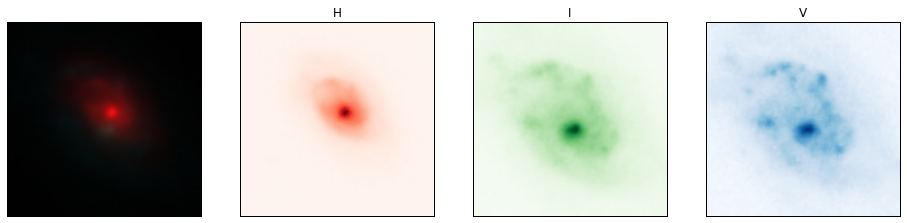

In [3]:
#from astropy.visualization import lupton_rgb  # Future
from astroimtools import lupton_rgb

# Additional fileName keyword saves the image as well.
minval = min(image_r.min(), image_g.min(), image_b.min())
maxval = max(image_r.max(), image_g.max(), image_b.max())
image = lupton_rgb.makeRGB(image_r, image_g, image_b,
                           minimum=minval, dataRange=maxval, Q=0)

# Look at the image array structure.
print('RGB cube shape:', image.shape)

# Display the result.
plot_rgb(image_r, image_g, image_b, image,
         rtitle='H', gtitle='I', btitle='V')

## Create an RGB Image from 2 Bands

If you simply want to create an RGB image from 2 instead of 3 bands, you can set the G layer to be an average of R and B. The example below creates an RGB image from only *V* and *I* bands:

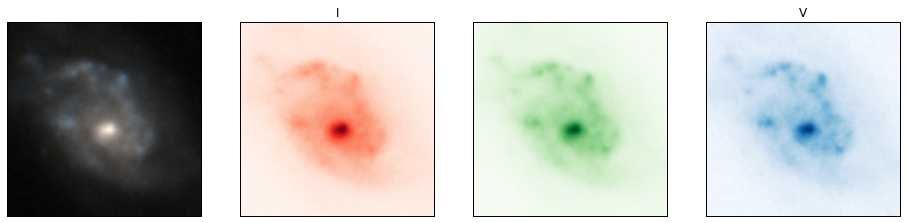

In [4]:
new_r = image_g
ave_g = 0.5 * (new_r + image_b)

minval = min(new_r.min(), image_b.min())
maxval = max(new_r.max(), image_b.max())

image2 = lupton_rgb.makeRGB(new_r, ave_g, image_b, minimum=minval, dataRange=maxval, Q=0)

plot_rgb(new_r, ave_g, image_b, image2,
         rtitle='I', btitle='V')